# COVID-19 Deaths Prediction with Neural Network
This notebook trains a neural network (MLPRegressor) to predict monthly COVID-19 death counts from encoded demographic data. We will load the encoded data, preprocess features, train-test split, fit the model, evaluate metrics, and visualize results.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

## 1. Load Encoded Data

In [2]:
df = pd.read_csv('./data/encoded_covid_deaths_data.csv')
df.head()

,year,month,region_Region 1,region_Region 10,region_Region 2,region_Region 3,region_Region 4,region_Region 5,region_Region 6,region_Region 7,...,subgroup2_18-29 years,subgroup2_30-39 years,subgroup2_40-49 years,subgroup2_5-11 years,subgroup2_50-64 years,subgroup2_65-74 years,subgroup2_75 years and over,subgroup2_missing,count_is_suppressed,count
0,2020,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0.0
1,2020,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0.0
2,2020,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0.0
3,2020,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0.0
4,2020,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0.0


## 2. Separate Features & Target

In [3]:
X = df.drop(columns=['count'])
y = df['count']
X.shape, y.shape

((51030, 45), (51030,))

## 3. Scale Numeric Features (Year & Month)

In [4]:
scaler = StandardScaler()
X[['year', 'month']] = scaler.fit_transform(X[['year', 'month']])
X[['year', 'month']].head()

,year,month
0,-1.409005,-1.507173
1,-1.409005,-1.507173
2,-1.409005,-1.507173
3,-1.409005,-1.507173
4,-1.409005,-1.507173


## 4. Train-Test Split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)
X_train.shape, X_test.shape

((40824, 45), (10206, 45))

## 3-fold cross-validation grid search

In [7]:
# Define the grid of parameters to search
param_grid = {
    'hidden_layer_sizes': [(64, 32), (128, 64), (256, 128)],
    'alpha': [1e-4, 1e-3, 1e-2],               # L2 penalty (regularization)
    'learning_rate_init': [1e-3, 1e-2],        # initial learning rate
}

# Set up the base MLP with early stopping to avoid overfitting
base_mlp = MLPRegressor(
    activation='relu',
    solver='adam',
    max_iter=200,
    early_stopping=True,
    random_state=42
)

grid = GridSearchCV(
    estimator=base_mlp,
    param_grid=param_grid,
    cv=3,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    verbose=2
)

# Fit the grid search
grid.fit(X_train, y_train)

# Retrain using the best estimator on the full training set
best_mlp = grid.best_estimator_
best_mlp.fit(X_train, y_train)

# Print the best parameters
print("Best parameters found:")
print(grid.best_params_)


Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] END alpha=0.0001, hidden_layer_sizes=(64, 32), learning_rate_init=0.01; total time=   3.3s
[CV] END alpha=0.0001, hidden_layer_sizes=(64, 32), learning_rate_init=0.01; total time=   4.6s
[CV] END alpha=0.0001, hidden_layer_sizes=(64, 32), learning_rate_init=0.01; total time=   6.1s
[CV] END alpha=0.0001, hidden_layer_sizes=(64, 32), learning_rate_init=0.001; total time=  12.0s


/Users/camilowu/Documents/Projects/covidproj/venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.0001, hidden_layer_sizes=(64, 32), learning_rate_init=0.001; total time=  12.1s


/Users/camilowu/Documents/Projects/covidproj/venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.0001, hidden_layer_sizes=(64, 32), learning_rate_init=0.001; total time=  12.5s
[CV] END alpha=0.0001, hidden_layer_sizes=(128, 64), learning_rate_init=0.01; total time=   8.3s
[CV] END alpha=0.0001, hidden_layer_sizes=(128, 64), learning_rate_init=0.01; total time=   4.5s
[CV] END alpha=0.0001, hidden_layer_sizes=(128, 64), learning_rate_init=0.01; total time=  11.9s
[CV] END alpha=0.0001, hidden_layer_sizes=(128, 64), learning_rate_init=0.001; total time=  19.7s


/Users/camilowu/Documents/Projects/covidproj/venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.0001, hidden_layer_sizes=(128, 64), learning_rate_init=0.001; total time=  21.0s
[CV] END alpha=0.0001, hidden_layer_sizes=(256, 128), learning_rate_init=0.001; total time=   9.5s


/Users/camilowu/Documents/Projects/covidproj/venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.0001, hidden_layer_sizes=(128, 64), learning_rate_init=0.001; total time=  20.7s
[CV] END alpha=0.0001, hidden_layer_sizes=(256, 128), learning_rate_init=0.01; total time=  18.6s
[CV] END alpha=0.001, hidden_layer_sizes=(64, 32), learning_rate_init=0.001; total time=  13.2s
[CV] END alpha=0.001, hidden_layer_sizes=(64, 32), learning_rate_init=0.001; total time=  14.4s


/Users/camilowu/Documents/Projects/covidproj/venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.001, hidden_layer_sizes=(64, 32), learning_rate_init=0.001; total time=  13.6s
[CV] END alpha=0.001, hidden_layer_sizes=(64, 32), learning_rate_init=0.01; total time=   3.5s
[CV] END alpha=0.0001, hidden_layer_sizes=(256, 128), learning_rate_init=0.01; total time=  21.1s
[CV] END alpha=0.0001, hidden_layer_sizes=(256, 128), learning_rate_init=0.01; total time=  24.3s
[CV] END alpha=0.001, hidden_layer_sizes=(64, 32), learning_rate_init=0.01; total time=   6.3s
[CV] END alpha=0.001, hidden_layer_sizes=(64, 32), learning_rate_init=0.01; total time=   6.8s
[CV] END alpha=0.001, hidden_layer_sizes=(128, 64), learning_rate_init=0.01; total time=   4.0s
[CV] END alpha=0.001, hidden_layer_sizes=(128, 64), learning_rate_init=0.01; total time=   4.2s
[CV] END alpha=0.001, hidden_layer_sizes=(128, 64), learning_rate_init=0.01; total time=  10.7s


/Users/camilowu/Documents/Projects/covidproj/venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.0001, hidden_layer_sizes=(256, 128), learning_rate_init=0.001; total time=  44.4s
[CV] END alpha=0.001, hidden_layer_sizes=(256, 128), learning_rate_init=0.001; total time=  10.0s


/Users/camilowu/Documents/Projects/covidproj/venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.001, hidden_layer_sizes=(128, 64), learning_rate_init=0.001; total time=  22.8s
[CV] END alpha=0.001, hidden_layer_sizes=(128, 64), learning_rate_init=0.001; total time=  24.7s


/Users/camilowu/Documents/Projects/covidproj/venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.001, hidden_layer_sizes=(128, 64), learning_rate_init=0.001; total time=  24.1s


/Users/camilowu/Documents/Projects/covidproj/venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.0001, hidden_layer_sizes=(256, 128), learning_rate_init=0.001; total time=  51.2s
[CV] END alpha=0.001, hidden_layer_sizes=(256, 128), learning_rate_init=0.01; total time=  17.7s
[CV] END alpha=0.01, hidden_layer_sizes=(64, 32), learning_rate_init=0.001; total time=  13.5s
[CV] END alpha=0.01, hidden_layer_sizes=(64, 32), learning_rate_init=0.01; total time=   2.7s


/Users/camilowu/Documents/Projects/covidproj/venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.01, hidden_layer_sizes=(64, 32), learning_rate_init=0.001; total time=  13.3s


/Users/camilowu/Documents/Projects/covidproj/venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.01, hidden_layer_sizes=(64, 32), learning_rate_init=0.001; total time=  14.4s
[CV] END alpha=0.001, hidden_layer_sizes=(256, 128), learning_rate_init=0.01; total time=  24.4s
[CV] END alpha=0.001, hidden_layer_sizes=(256, 128), learning_rate_init=0.01; total time=  21.3s
[CV] END alpha=0.01, hidden_layer_sizes=(64, 32), learning_rate_init=0.01; total time=   5.2s
[CV] END alpha=0.01, hidden_layer_sizes=(64, 32), learning_rate_init=0.01; total time=   5.6s
[CV] END alpha=0.01, hidden_layer_sizes=(128, 64), learning_rate_init=0.01; total time=   4.0s
[CV] END alpha=0.01, hidden_layer_sizes=(128, 64), learning_rate_init=0.01; total time=   4.4s
[CV] END alpha=0.01, hidden_layer_sizes=(128, 64), learning_rate_init=0.01; total time=  10.1s


/Users/camilowu/Documents/Projects/covidproj/venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.001, hidden_layer_sizes=(256, 128), learning_rate_init=0.001; total time=  49.0s
[CV] END alpha=0.001, hidden_layer_sizes=(256, 128), learning_rate_init=0.001; total time=  44.0s
[CV] END alpha=0.01, hidden_layer_sizes=(256, 128), learning_rate_init=0.001; total time=  10.4s


/Users/camilowu/Documents/Projects/covidproj/venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.01, hidden_layer_sizes=(128, 64), learning_rate_init=0.001; total time=  24.1s
[CV] END alpha=0.01, hidden_layer_sizes=(128, 64), learning_rate_init=0.001; total time=  23.4s
[CV] END alpha=0.01, hidden_layer_sizes=(128, 64), learning_rate_init=0.001; total time=  22.6s
[CV] END alpha=0.01, hidden_layer_sizes=(256, 128), learning_rate_init=0.01; total time=  13.6s
[CV] END alpha=0.01, hidden_layer_sizes=(256, 128), learning_rate_init=0.01; total time=  18.8s
[CV] END alpha=0.01, hidden_layer_sizes=(256, 128), learning_rate_init=0.01; total time=  17.9s


/Users/camilowu/Documents/Projects/covidproj/venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.01, hidden_layer_sizes=(256, 128), learning_rate_init=0.001; total time=  35.9s
[CV] END alpha=0.01, hidden_layer_sizes=(256, 128), learning_rate_init=0.001; total time=  31.5s
Best parameters found:
{'alpha': 0.001, 'hidden_layer_sizes': (256, 128), 'learning_rate_init': 0.01}


## 6. Evaluate Model Performance

In [8]:
y_pred = best_mlp.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Test MAE : {mae:.2f}')
print(f'Test RMSE: {rmse:.2f}')
print(f'R²     : {r2:.3f}')


# Retrain using the best estimator on the full training set
best_mlp = grid.best_estimator_
best_mlp.fit(X_train, y_train)

Test MAE : 43.20
Test RMSE: 222.73
R²     : 0.858


MLPRegressor(alpha=0.001, early_stopping=True, hidden_layer_sizes=(256, 128),
             learning_rate_init=0.01, random_state=42)

## 7. Visualizations
### 7.1 Actual vs Predicted
### 7.2 Residual Distribution
### 7.3 Residuals vs Predicted

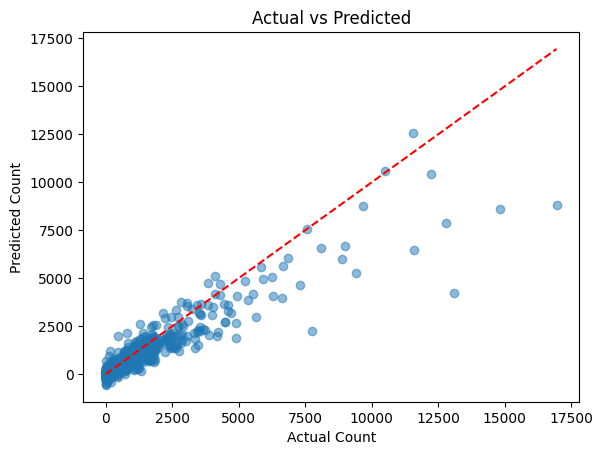

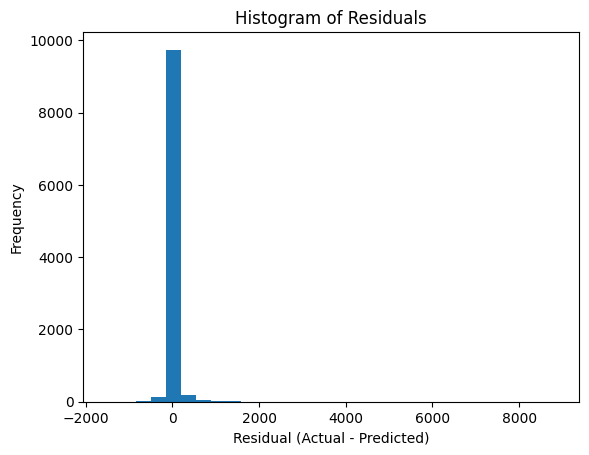

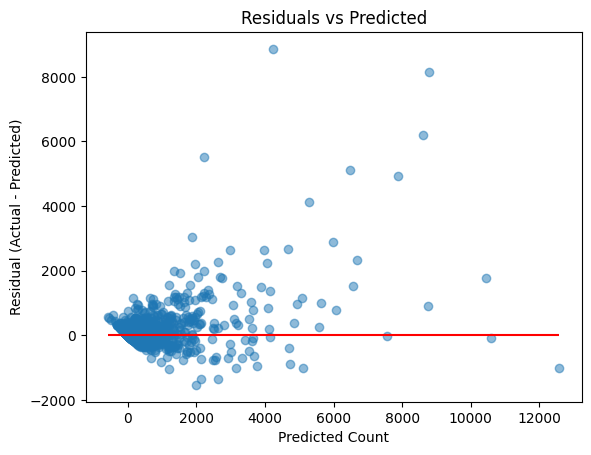

In [ ]:
residuals = y_test - y_pred

# Evaluate on the test set
y_pred_best = best_mlp.predict(X_test)
mse_best  = mean_squared_error(y_test, y_pred_best)
rmse_best = sqrt(mse_best)
mae_best  = mean_absolute_error(y_test, y_pred_best)
r2_best   = r2_score(y_test, y_pred_best)

# Actual vs Predicted
plt.figure()
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Count')
plt.ylabel('Predicted Count')
plt.title('Actual vs Predicted')
plt.show()

# Residuals vs Predicted
plt.figure()
plt.scatter(y_pred, residuals, alpha=0.5)
plt.hlines(0, y_pred.min(), y_pred.max(), colors='r')
plt.xlabel('Predicted Count')
plt.ylabel('Residual (Actual - Predicted)')
plt.title('Residuals vs Predicted')
plt.show()